<a href="https://colab.research.google.com/github/SirilukLee/Pandas/blob/main/My_pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas (2)

Let's learn more advanced features of Pandas

**Outline**
- Function application
- Grouping and Aggregating
- Working with Text Data
- Working with Missing Data
- Datetime & Time Series



In [1]:
import numpy as np
import pandas as pd

##Function application

To apply your own or another library’s functions to pandas objects, you should be aware of the three methods below.

###1. Row or column-wise function application
Arbitrary functions can be applied along the axes of a DataFrame using the `apply()` method, which, like the descriptive statistics methods, takes an optional `axis` argument:

In [3]:
index = pd.date_range("1/1/2000", periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [4]:
df

,A,B,C
2000-01-01,-1.539836,1.739939,-1.359892
2000-01-02,0.021912,-0.672903,-3.310414
2000-01-03,-0.138532,0.171928,0.483204
2000-01-04,-0.626637,-0.212031,0.044117
2000-01-05,-0.076493,0.493112,0.245434
2000-01-06,1.105891,-0.260024,0.399615
2000-01-07,0.718680,-1.361222,-1.827342
2000-01-08,0.284711,0.188179,-2.459565


In [5]:
df.apply(np.mean) #default axis = 0 or ‘index’: apply function to each column.

A   -0.031288
B    0.010872
C   -0.973105
dtype: float64

In [6]:
df.apply(np.mean, axis=1) # axis = 1 or ‘columns’: apply function to each row.

2000-01-01   -0.386596
2000-01-02   -1.320468
2000-01-03    0.172200
2000-01-04   -0.264850
2000-01-05    0.220684
2000-01-06    0.415161
2000-01-07   -0.823294
2000-01-08   -0.662225
Freq: D, dtype: float64

In [7]:
df.apply(lambda x: x.max() - x.min())

A    2.645726
B    3.101161
C    3.793619
dtype: float64

You may also pass additional arguments and keyword arguments to the apply() method. For instance, consider the following function you would like to apply:

In [8]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

df.apply(subtract_and_divide, sub=5, divide=3)

,A,B,C
2000-01-01,-2.179945,-1.086687,-2.119964
2000-01-02,-1.659363,-1.890968,-2.770138
2000-01-03,-1.712844,-1.609357,-1.505599
2000-01-04,-1.875546,-1.737344,-1.651961
2000-01-05,-1.692164,-1.502296,-1.584855
2000-01-06,-1.298036,-1.753341,-1.533462
2000-01-07,-1.427107,-2.120407,-2.275781
2000-01-08,-1.571763,-1.603940,-2.486522


###2. Applying elementwise functions
Since not all functions can be vectorized (accept NumPy arrays and return another array or value), the methods `applymap()` on **DataFrame** and analogously `map()` on **Series** accept any Python function *taking a single value and returning a single value.* For example:

In [9]:
df2 = pd.DataFrame(
    [["Apple", 1, 100], 
     ["Banana", 2, 50], 
     ["Orange", 5, np.nan], 
     ["Mango", 3, 250]], 
    index=["a", "b", "c", "d"], 
    columns=["Fruit", "Amount", "Price"]
)
df2

,Fruit,Amount,Price
a,Apple,1,100.0
b,Banana,2,50.0
c,Orange,5,NaN
d,Mango,3,250.0


In [10]:
df2["Fruit"].map(len)

a    5
b    6
c    6
d    5
Name: Fruit, dtype: int64

In [11]:
def get_len(e):
    return len(str(e))
df2.applymap(get_len)

,Fruit,Amount,Price
a,5,1,5
b,6,1,4
c,6,1,3
d,5,1,5


**EX: Student Alcohol Consumption**

In [12]:
csv_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(csv_url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column**

In [13]:
df = df.loc[:, 'school':'guardian']
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


**Create a lambda function that will capitalize strings.**

**[Hint]** using `.capitalize()` method 

In [15]:
# YOUR CODE HERE
fx = lambda x: x.capitalize()

**Capitalize both Mjob and Fjob**

In [19]:
# YOUR CODE HERE
df['Mjob'] = df['Mjob'].apply(fx)
df['Fjob'] = df['Fjob'].apply(fx)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father


**Create a function called majority that returns a boolean value to a new column called** `legal_drinker` 

**(Consider majority as older than 17 years old)** 

In [22]:
# YOUR CODE HERE
def majority(s):
  return s > 17

df['legal_drinker'] = df['age'].map(majority)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


**Multiply every number of the dataset by 10.**

**I know this makes no sense, don't forget it is just an exercise**

To determine whether a column/variable is a number or not.
```python
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

df = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1.0, 2.0, 3.0]})

is_string_dtype(df['A'])
>>>> True

is_numeric_dtype(df['B'])
>>>> True
```

[Credit](https://stackoverflow.com/questions/19900202/how-to-determine-whether-a-column-variable-is-numeric-or-not-in-pandas-numpy)

To determine whether a column/variable is a boolean or not.
```python
import pandas as pd

df = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [True, False, True]})

df['B'].dtypes.name
>>>> 'bool'
```

In [27]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def multiply(s):
  if is_numeric_dtype(s) and s.dtypes.name != 'bool':
    return s*10
  return s

df.apply(multiply)



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,200,U,LE3,A,20,20,Services,Services,course,other,True
391,MS,M,170,U,LE3,T,30,10,Services,Services,course,mother,False
392,MS,M,210,R,GT3,T,10,10,Other,Other,course,other,True
393,MS,M,180,R,LE3,T,30,20,Services,Other,course,mother,True


###3. Tablewise function application `pipe`
DataFrames and Series can be passed into functions. However, if the function needs to be called in a chain, consider using the `pipe()` method.

In [28]:
def extract_state_name(df):
    """
    Illinois, IL -> Illinois for state_name column
    """
    df["state_name"] = df["state_and_code"].str.split(",").str.get(0) #get0 คือ เอาตัวแรก
    return df
  
def add_country_name(df, country_name=None):
  """
  Illinois -> Illinois-US for state_name column
  """
  col = "state_name"
  df["state_and_country"] = df[col] + country_name
  return df


df_p = pd.DataFrame({"state_and_code": ["Illinois, IL", "California, CA", "Florida, FL"]})

In [29]:
df_p

,state_and_code
0,"Illinois, IL"
1,"California, CA"
2,"Florida, FL"


In [30]:
add_country_name(extract_state_name(df_p), country_name="US")

,state_and_code,state_name,state_and_country
0,"Illinois, IL",Illinois,IllinoisUS
1,"California, CA",California,CaliforniaUS
2,"Florida, FL",Florida,FloridaUS


In [31]:
df_p.pipe(extract_state_name).pipe(add_country_name, country_name="US")

,state_and_code,state_name,state_and_country
0,"Illinois, IL",Illinois,IllinoisUS
1,"California, CA",California,CaliforniaUS
2,"Florida, FL",Florida,FloridaUS


##Grouping and aggregation

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/ks-projects-201801.csv')

**Meta Data** <br>
ข้อมูลที่ใช้เป็นข้อมูลของ Kick starter ซึ่งประกอบไปด้วย column ทั้งหมด 14 
columns <br>
1. name : ชื่อของโปรเจคที่มาเสนอทุน
2. category : หมวดหมู่ของโปรเจคนั้นๆ
3. main category : หมวดหมู่หลักของโปรเจค
4. currency : สกุลเงินที่โปรเจคนั้นใช้
5. deadline : วันที่โปรเจคนี้จะสิ้นสุด
6. goal : จำนวนเงินที่เจ้าของโปรเจคต้องการ
7. launched : วันเริ่มโปรเจค
8. pledged : จำนวนเงินสนับสนุนในสกุลเงินประเทศต้นทาง
9. state : สถานะของโปรเจค
10. backers : จำนวนผู้สนับสนุน
11. country : ประเทศ
12. usd pledged : จำนวนเงินที่ถูกสนับสนุนในสกุลเงิน us dollar
13. ued pledged real : จำนวนเงินจริงๆที่ถูกสนับสนุนในสกุลเงิน us dollar
14. usd goal real : จำนวนเงินเป้าหมายในสกุลเงิน us dollar

In [37]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


###value_counts

In [38]:
df['category'].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [39]:
df['category'].value_counts(normalize=True)

Product Design     0.058929
Documentary        0.042621
Music              0.041533
Tabletop Games     0.037448
Shorts             0.032633
                     ...   
Residencies        0.000182
Letterpress        0.000129
Chiptune           0.000092
Literary Spaces    0.000071
Taxidermy          0.000034
Name: category, Length: 159, dtype: float64

###Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

Let's try to get status counts of each category.

In [40]:
df.groupby('category')

In [41]:
df.groupby('category')['state'].value_counts()

category     state     
3D Printing  failed        326
             successful    242
             canceled       91
             suspended      15
             live            8
                          ... 
Zines        successful    179
             failed        176
             canceled       26
             live            9
             suspended       1
Name: state, Length: 786, dtype: int64

In [42]:
df.groupby(['category', 'main_category'])['backers'].sum()

category     main_category
3D Printing  Technology       158779
Academic     Publishing        37751
Accessories  Fashion          256036
Action       Film & Video      34708
Animals      Photography       10748
                               ...  
Woodworking  Crafts            22612
Workshops    Dance              3422
World Music  Music            113403
Young Adult  Publishing        15927
Zines        Publishing        21725
Name: backers, Length: 170, dtype: int64

In [43]:
cat_grp = df.groupby(['category', 'main_category'], as_index=False) #asindex=false: make it be a dataframe
cat_grp['backers'].sum()

,category,main_category,backers
0,3D Printing,Technology,158779
1,Academic,Publishing,37751
2,Accessories,Fashion,256036
3,Action,Film & Video,34708
4,Animals,Photography,10748
...,...,...,...
165,Woodworking,Crafts,22612
166,Workshops,Dance,3422
167,World Music,Music,113403
168,Young Adult,Publishing,15927


**EX: หาค่าเฉลี่ยของ `usd_pledged_real` ของ project จากแต่ละประเทศ (country)**

In [47]:
mean = df.groupby(['country'])['usd_pledged_real'].mean().sort_values(ascending=False)
mean

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
N,0"     2949.850598
JP       2897.210250
MX       1387.002568
Name: usd_pledged_real, dtype: float64

**EX: แสดงจำนวน project ในแต่ละสถานะ (state) สำหรับ project ในหมวดหมู่ (category) `Product Design` และ `Music`**

*Hint: use `.loc[]`*

In [50]:
s = df.groupby('category')['state'].value_counts()
s.loc['prodct',''Design' ,'Music']

AttributeError: ignored

###Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data.

We can use the `agg()` method.

In [51]:
df.groupby('category')['usd_pledged_real'].agg(['mean', 'median'])

,mean,median
category,,
3D Printing,66323.861611,3523.00
Academic,2891.013886,55.50
Accessories,6526.295185,603.00
Action,3699.426324,50.00
Animals,2994.210078,65.00
...,...,...
Woodworking,1599.734387,110.00
Workshops,1663.994085,236.46
World Music,4199.595918,1000.00


###Applying a function to each group independently

เรามาลองหาว่ามี project จำนวนเท่าไหร่ที่ได้รับ `usd_pledged_real` มากกว่า `usd_goal_real` ในแต่ละ `main_category`

In [54]:
def my_func(proj):

  return len(proj[proj['usd_pledged_real'] > proj['usd_goal_real']])
 
df.groupby('main_category').apply(my_func)

main_category
Art             11147
Comics           5825
Crafts           2074
Dance            2219
Design          10763
Fashion          5555
Film & Video    23016
Food             6007
Games           12655
Journalism        971
Music           24649
Photography      3210
Publishing      11970
Technology       6620
Theater          6165
dtype: int64

**EX: ลองหาว่าสำหรับ project ที่ได้รับ `usd_pledged_real` มากกว่า `usd_goal_real` ในแต่ละ `main_category` นั้นมีค่าเฉลี่ย `usd_pledge_real` เท่าไหร่**

In [56]:
def my_func(df_g):
  filt = df_g['usd_pledged_real'] > df_g['usd_goal_real']
  return df_g[filt]['usd_pledged_real'].mean()
 
df.groupby('main_category').apply(my_func)



main_category
Art              7169.966108
Comics          11431.509830
Crafts           5772.033616
Dance            5337.382235
Design          62822.217888
Fashion         20569.035446
Film & Video    14283.216602
Food            17652.820181
Games           53955.178793
Journalism      10795.030124
Music            7401.256484
Photography     10427.800343
Publishing       9668.032513
Technology      93698.860733
Theater          6199.080122
dtype: float64

##Working with text data
There are two ways to store text data in pandas:

- `object` -dtype NumPy array.
- `StringDtype` extension type.

In [57]:
pd.Series(["a", "b", "c"])

0    a
1    b
2    c
dtype: object

In [58]:
pd.Series(["a", "b", "c"], dtype="string") # or dtype=pd.StringDtype()

0    a
1    b
2    c
dtype: string

###String methods

Series and Index are equipped with a set of string processing methods that make it easy to operate on each element of the array.

These are accessed via the `str` attribute and generally have names matching the equivalent (scalar) built-in string methods.

The full list of available methods can be found [HERE](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary)

In [59]:
s = pd.Series(
    ["A", "B", "C", np.nan, "CABA", "dog", "cat"], dtype="string"
)

In [60]:
s.str.lower()

0       a
1       b
2       c
3    <NA>
4    caba
5     dog
6     cat
dtype: string

In [61]:
s.str.upper()

0       A
1       B
2       C
3    <NA>
4    CABA
5     DOG
6     CAT
dtype: string

In [62]:
s.str.len()

0       1
1       1
2       1
3    <NA>
4       4
5       3
6       3
dtype: Int64

###Splitting and replacing strings

Methods like `split` return a Series of lists:

In [65]:
s2 = pd.Series(["a_b_c", "c_d_e", np.nan, "f_g_h"], dtype="string")
s2.str.split("_")

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

Elements in the split lists can be accessed using `get` or `[]` notation:

In [66]:
print(s2.str.split("_").str.get(1))
print(s2.str.split("_").str[0])

0       b
1       d
2    <NA>
3       g
dtype: object
0       a
1       c
2    <NA>
3       f
dtype: object


It is easy to expand this to return a DataFrame using `expand` option.

In [67]:
s2.str.split("_", expand=True)

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


In [68]:
s3 = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "", np.nan, "CABA", "dog", "cat"],
    dtype="string",
)

In [69]:
s3.str.replace('A', 'XX', regex=False)

0        XX
1         B
2         C
3     XXaba
4      Baca
5          
6      <NA>
7    CXXBXX
8       dog
9       cat
dtype: string

In [70]:
# Optionally replace can use Regex
s3.str.replace("^.a|dog", "XX-XX ", case=False, regex=True)

0           A
1           B
2           C
3    XX-XX ba
4    XX-XX ca
5            
6        <NA>
7    XX-XX BA
8      XX-XX 
9     XX-XX t
dtype: string

###Concatenation

In [71]:
s = pd.Series(["a", "b", "c", "d"], dtype="string")
s.str.cat(sep=",")

'a,b,c,d'

By default, missing values are ignored. Using na_rep, they can be given a representation:

In [72]:
t = pd.Series(["a", "b", np.nan, "d"], dtype="string")
t.str.cat(sep=",")
t.str.cat(sep=",", na_rep="-")

'a,b,-,d'

Concatenating a Series and something list-like into a Series.

The first argument to cat() can be a list-like object, provided that it matches the length of the calling Series.

In [74]:
s.str.cat(others=["A", "B", "C", "D"])

0    aA
1    bB
2    cC
3    dD
dtype: string

**EX:** จาก DataFrame ที่กำหนด ให้แยกชื่อเต็ม `name` เป็น 3 columns คือ `first` `middle` และ `last` 

In [75]:
df = pd.DataFrame({
    'name': ['Alberto  Franco','Gino Ann Mcneill','Ryan  Parkes', 'Eesha Artur Hinton', 'Syed  Wharton'],
    'date_of_birth ': ['17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'age': [18.5, 21.2, 22.5, 22, 23]
})

df

,name,date_of_birth,age
0,Alberto Franco,17/05/2002,18.5
1,Gino Ann Mcneill,16/02/1999,21.2
2,Ryan Parkes,25/09/1998,22.5
3,Eesha Artur Hinton,11/05/2002,22.0
4,Syed Wharton,15/09/1997,23.0


In [104]:
# YOUR CODE HERE
df2 = df['name'].str.split(" ",expand=True)
df2.rename({0:'first',1:'middle',2:'last'}, inplace=True, axis=1)
df2
pd.concat([df,df2], axis=1)


,name,date_of_birth,age,first,first,middle,last
0,Alberto Franco,17/05/2002,18.5,"[Alberto, , Franco]",Alberto,,Franco
1,Gino Ann Mcneill,16/02/1999,21.2,"[Gino, Ann, Mcneill]",Gino,Ann,Mcneill
2,Ryan Parkes,25/09/1998,22.5,"[Ryan, , Parkes]",Ryan,,Parkes
3,Eesha Artur Hinton,11/05/2002,22.0,"[Eesha, Artur, Hinton]",Eesha,Artur,Hinton
4,Syed Wharton,15/09/1997,23.0,"[Syed, , Wharton]",Syed,,Wharton


**EX:** Remove whitespaces, left sided whitespaces and right sided whitespaces of the string values of a given pandas series.

In [106]:
color = pd.Index([' Green', 'Black ', ' Red ', 'White', ' Pink '])
color

Index([' Green', 'Black ', ' Red ', 'White', ' Pink '], dtype='object')

In [107]:
# YOUR CODE HERE
color.str.strip()

Index(['Green', 'Black', 'Red', 'White', 'Pink'], dtype='object')

**EX:** Concatenating address with name column using `', '` for separator

In [111]:
df = pd.DataFrame({'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
                   'Age':[27, 24, 22, 32], 
                   'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
                   'Qualification':['Msc', 'MA', 'MCA', 'Phd']}) 
df

,Name,Age,Address,Qualification
0,Jai,27,Nagpur,Msc
1,Princi,24,Kanpur,MA
2,Gaurav,22,Allahabad,MCA
3,Anuj,32,Kannuaj,Phd


In [112]:
# YOUR CODE HERE
df['Name'] = df['Name'].str.cat(df['Address'], sep=', ')
df

,Name,Age,Address,Qualification
0,"Jai, Nagpur",27,Nagpur,Msc
1,"Princi, Kanpur",24,Kanpur,MA
2,"Gaurav, Allahabad",22,Allahabad,MCA
3,"Anuj, Kannuaj",32,Kannuaj,Phd


##Working with missing data


In [113]:
people = {
    'first': ['Bundit', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Thanasopon', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['bundit@it.kmitl.ac.th', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': [np.nan, '55', '63', '36', None, None, 'Missing']
}

df = pd.DataFrame(people)
df

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,NaN
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


Pandas does not consider "Missing" and "NA" are not considered missing values.

**However, `None` and `np.nan` are missing values.**

In [114]:
df.isna()

,first,last,email,age
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,False,False,False,False


In [115]:
df.replace('NA', np.nan, inplace=True)
df.replace('Missing', np.nan, inplace=True)
df

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,NaN
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


In [116]:
df.dropna(axis=0, how="all") # default how="any" #how=allก็คือจะลบเมื่อทั้งแถวเป็นna

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,NaN
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None


In [117]:
# ต้องมี data point ที่ไม่ใช่ NaN >= 2 ตัวจึงจะเก็บไว้
df.dropna(axis=0, thresh=2)

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,NaN
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36


**EX: ลอง drop ข้อมูล column สำหรับ column ที่มีค่า NaN มากกว่า 3 ตัว**

In [120]:
df.dropna(axis=1, thresh=4)

,first,last,email
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th
1,Jane,Doe,JaneDoe@email.com
2,John,Doe,JohnDoe@email.com
3,Chris,Schafer,None
4,NaN,NaN,NaN
5,None,NaN,Anonymous@email.com
6,NaN,NaN,NaN


In [121]:
df.dropna(axis=0, how='any', subset=['email']) #ค่าว่างที่email

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,NaN
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
5,None,NaN,Anonymous@email.com,None


In [122]:
df.fillna('MISSING')

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,MISSING
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,MISSING,36
4,MISSING,MISSING,MISSING,MISSING
5,MISSING,MISSING,Anonymous@email.com,MISSING
6,MISSING,MISSING,MISSING,MISSING


Let's check data types of each column.

In [123]:
df.dtypes

first    object
last     object
email    object
age      object
dtype: object

In [ ]:
df['age'].astype(int)

ValueError: ignored

In [125]:
df['age'] = df['age'].astype(float)
df.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [126]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [127]:
df['age'] = round(df['age'])
df

,first,last,email,age
0,Bundit,Thanasopon,bundit@it.kmitl.ac.th,51.0
1,Jane,Doe,JaneDoe@email.com,55.0
2,John,Doe,JohnDoe@email.com,63.0
3,Chris,Schafer,None,36.0
4,NaN,NaN,NaN,51.0
5,None,NaN,Anonymous@email.com,51.0
6,NaN,NaN,NaN,51.0


##Datetime and time series

In [131]:
df = pd.read_csv('/content/drive/MyDrive/eth_data.csv')

In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [132]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

**Datetime string format** : [Doc](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

In [133]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [134]:
# Get day of week
df.loc[0, 'Date'].day_name()

'Friday'

In [135]:
df['Date'].max() - df['Date'].min() 

Timedelta('986 days 09:00:00')

**EX: สร้าง column ใหม่ที่เก็บ weekday ของ Date**

Hint: [Series.dt.day_name()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html)

In [138]:
df['weekday'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,weekday
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


**Filtering Datetime**

In [139]:
df[df['Date'] >= '2020']

,Date,Symbol,Open,High,Low,Close,Volume,weekday
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [140]:
df[(df['Date'] >= '2019-07-01') & (df['Date'] <= '2019-12-31')]

,Date,Symbol,Open,High,Low,Close,Volume,weekday
1772,2019-12-31 00:00:00,ETHUSD,131.10,131.10,130.31,131.03,345342.78,Tuesday
1773,2019-12-30 23:00:00,ETHUSD,131.97,132.19,130.76,131.10,301891.01,Monday
1774,2019-12-30 22:00:00,ETHUSD,131.46,131.97,131.46,131.97,185843.91,Monday
1775,2019-12-30 21:00:00,ETHUSD,131.44,131.73,131.21,131.46,179063.98,Monday
1776,2019-12-30 20:00:00,ETHUSD,130.72,131.93,130.67,131.44,549417.77,Monday
...,...,...,...,...,...,...,...,...
6160,2019-07-01 04:00:00,ETHUSD,298.15,299.80,295.57,297.97,1036527.82,Monday
6161,2019-07-01 03:00:00,ETHUSD,296.99,301.32,295.81,298.15,1465814.16,Monday
6162,2019-07-01 02:00:00,ETHUSD,293.93,298.58,292.15,296.99,1367256.41,Monday
6163,2019-07-01 01:00:00,ETHUSD,295.11,298.70,293.53,293.93,2293925.50,Monday


Let's look at daily `High` and `Low` values.

[DateOffset Object](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [141]:
df.set_index('Date', inplace=True)
df

,Symbol,Open,High,Low,Close,Volume,weekday
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [147]:
highs = df['High'].resample('D') #resample D คือ เป็นวัน
highs

In [149]:
highs = highs.max()
highs

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

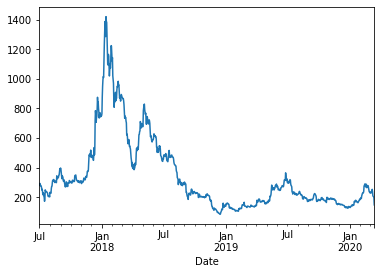

In [150]:
highs.plot()

**EX: สร้าง Series ของ ราคาต่ำสุดรายวัน**

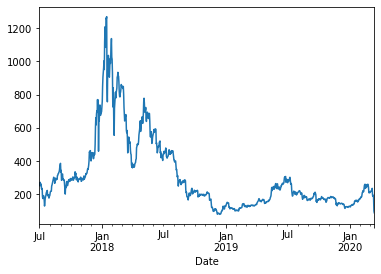

In [155]:
low = df['Low'].resample('D') #เหมือนgroupby เป็นวัน
min = low.min()
min.plot()
